### imports

In [ ]:
!pip install blitz-bayesian-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 3.8 MB/s 


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np

from blitz.modules import BayesianLinear, BayesianConv2d
from blitz.losses import kl_divergence_from_nn
from blitz.utils import variational_estimator

import matplotlib.pyplot as plt
import pickle

### Bayesian neural network

In [ ]:
# Hyper Parameters
input_size = 784
num_epochs = 100
batch_size = 100

transform = transforms.Compose(
         [transforms.ToTensor(),
         transforms.Normalize((0.1307,), (0.3015,))])

In [ ]:
def general_eval(nn_eval , test_loader, range_lst):
 #calculate avg accuracy of the test set
  test_correct = 0
  test_total = 0
  test_count =[]
  test_acc =[]
  class_correct = list(0. for i in range(range_lst))
  class_total = list(0. for i in range(range_lst))

  with torch.no_grad():

         for i, (test_images, test_labels) in enumerate(test_loader):
                test_images = test_images.to(device)
                test_labels = test_labels.to(device)

                # Forward only
                test_outputs = nn_eval(test_images)
                _, predicted_test = torch.max(test_outputs.data, 1)
                test_total += test_labels.size(0)
                test_correct += (predicted_test == test_labels).sum().item()
                test_count.append(test_total)
                test_acc.append(test_correct/ test_total)

                for j in range(test_labels.size(0)):
                      class_correct[test_labels[j].item()] += (test_labels[j]== predicted_test[j]).item()
                      class_total[test_labels[j].item()] +=1


  plt.plot(test_count,test_acc , color = 'green')
  plt.title("Accuracy Value")
  plt.xlabel("Number of Samples")
  plt.ylabel("Accuracy")
  plt.show()

  print ('Accuracy of the Test Set is: %f %%' % (100 * test_correct / test_total))

  if class_total[0]!=0:
    for i in range(range_lst):
      print('Accuracy of %d : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))
  else:
    print('Accuracy of %d : %2d %%' % (3, 100 * class_correct[3] / class_total[3]))
    print('Accuracy of %d : %2d %%' % (8, 100 * class_correct[8] / class_total[8]))

### i) Test a classifier on the full data

In [ ]:
def evaluate_hw1_i():

  # Dataset Loader (Input Pipline)

  test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transform)

  test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

  #load my trained network
  nn_eval_i = pickle.load(open("train_hw1_206238891_fulldataset.pkl", 'rb'))

  general_eval(nn_eval_i, test_loader, 10)

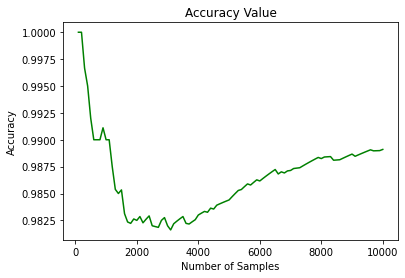

Accuracy of the Test Set is: 98.910000 %
Accuracy of 0 : 99 %
Accuracy of 1 : 99 %
Accuracy of 2 : 99 %
Accuracy of 3 : 98 %
Accuracy of 4 : 99 %
Accuracy of 5 : 99 %
Accuracy of 6 : 98 %
Accuracy of 7 : 98 %
Accuracy of 8 : 97 %
Accuracy of 9 : 98 %


In [ ]:
evaluate_hw1_i()

### ii) Test a classifier on the first 200 samples of Mnist

In [ ]:
def evaluate_hw1_ii():

  # Dataset Loader (Input Pipline)

  test_dataset200 = dsets.MNIST(root='./data',
                           train=False,
                           transform=transform)



  test_loader200 = torch.utils.data.DataLoader(dataset=test_dataset200,
                                          batch_size=batch_size,
                                          shuffle=False)

  #load my trained network
  nn_eval_ii = pickle.load(open("train_hw1_206238891_200.pkl", 'rb'))

  general_eval(nn_eval_ii, test_loader200, 10)

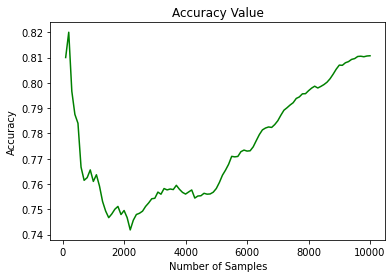

Accuracy of the Test Set is: 81.070000 %
Accuracy of 0 : 92 %
Accuracy of 1 : 96 %
Accuracy of 2 : 87 %
Accuracy of 3 : 80 %
Accuracy of 4 : 83 %
Accuracy of 5 : 56 %
Accuracy of 6 : 73 %
Accuracy of 7 : 86 %
Accuracy of 8 : 76 %
Accuracy of 9 : 73 %


In [ ]:
evaluate_hw1_ii()

### iii)Test a classifier on the 200 first '3' and '8'

In [ ]:
def evaluate_hw1_iii():

  # Dataset Loader (Input Pipline)


  test_dataset200_83 = dsets.MNIST(root='./data',
                           train=False,
                           transform=transform)

  #choose only 3 and 8
  images = test_dataset200_83.data
  labels = test_dataset200_83.targets

  test_filter = np.where((labels == 8) | (labels == 3))
  test_dataset200_83.data = images[test_filter]
  test_dataset200_83.targets = labels[test_filter]


  test_loader200_83 = torch.utils.data.DataLoader(dataset=test_dataset200_83,
                                          batch_size=batch_size,
                                          shuffle=False)


  #load my trained network
  nn_eval_iii = pickle.load(open("train_hw1_206238891_200_38.pkl", 'rb'))

  general_eval(nn_eval_iii, test_loader200_83, 10)

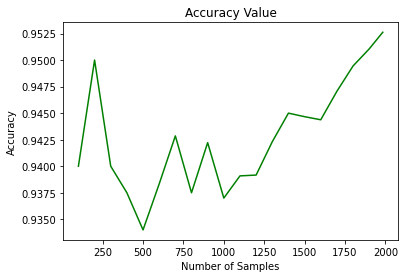

Accuracy of the Test Set is: 95.262097 %
Accuracy of 3 : 95 %
Accuracy of 8 : 94 %


In [ ]:
evaluate_hw1_iii()

### iv)Train a classifier on all '3' and '8'

In [ ]:
def evaluate_hw1_iv():

  # Dataset Loader (Input Pipline)


  test_dataset38 = dsets.MNIST(root='./data',
                           train=False,
                           transform=transform)

  #choose only 3 and 8
  images = test_dataset38.data
  labels = test_dataset38.targets

  test_filter = np.where((labels == 8) | (labels == 3))
  test_dataset38.data = images[test_filter]
  test_dataset38.targets = labels[test_filter]

  test_loader38 = torch.utils.data.DataLoader(dataset= test_dataset38,
                                          batch_size=batch_size,
                                          shuffle=False)

  #load my trained network
  nn_eval_iv = pickle.load(open("train_hw1_206238891_38.pkl", 'rb'))

  general_eval(nn_eval_iv, test_loader38, 10)

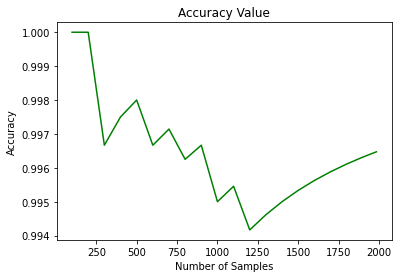

Accuracy of the Test Set is: 99.647177 %
Accuracy of 3 : 99 %
Accuracy of 8 : 99 %


In [ ]:
evaluate_hw1_iv()

### v)With Rnadomization - Train on the first 200 samples, random labels

In [ ]:
def evaluate_hw1_v():

  # Dataset Loader (Input Pipline)


  test_dataset_rnd = dsets.MNIST(root='./data',
                           train=False,
                           transform=transform)

  #Generate random labels
  rnd_test = torch.rand(len(test_dataset_rnd))
  rnd_test.apply_(lambda x: 1 if (x>=0.5) else 0)
  rnd_test = rnd_test.type(torch.LongTensor)


  images_test = test_dataset_rnd.data
  test_dataset_rnd.data = images_test
  test_dataset_rnd.targets = rnd_test


  test_loader_rnd = torch.utils.data.DataLoader(dataset=test_dataset_rnd,
                                          batch_size=batch_size,
                                          shuffle=False)



  #load my trained network
  nn_eval_v = pickle.load(open("train_hw1_206238891_rnd.pkl", 'rb'))

  general_eval(nn_eval_v, test_loader_rnd,2)

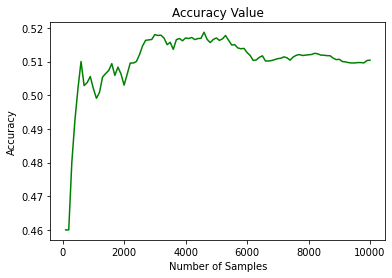

Accuracy of the Test Set is: 51.040000 %
Accuracy of 0 : 44 %
Accuracy of 1 : 57 %


In [ ]:
evaluate_hw1_v()